In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv('Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Check for null values
df.isnull().sum()

# Encode categorical columns
df.replace({'yes': 1, 'no': 0}, inplace=True)

# If there are non-numeric columns like 'furnishingstatus', use one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# View column names
df.columns


C:\Users\sridh\AppData\Local\Temp\ipykernel_15896\4222079040.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [5]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 970043.403920164
MSE: 1754318687330.664
R² Score: 0.6529242642153184


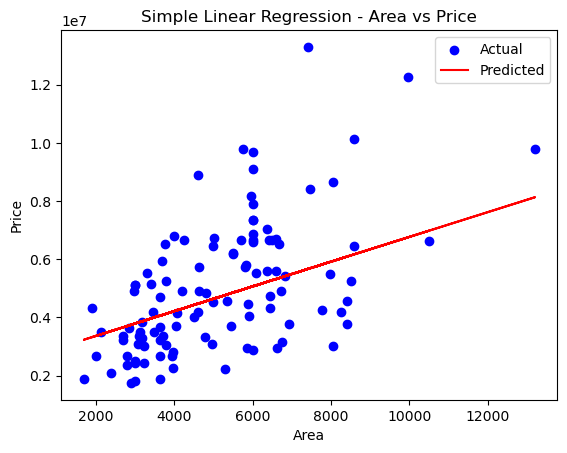

In [8]:
# Train with single feature
model = LinearRegression()
model.fit(X_train[['area']], y_train)
y_pred_area = model.predict(X_test[['area']])

plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.plot(X_test['area'], y_pred_area, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression - Area vs Price')
plt.legend()
plt.show()


In [11]:
coeff = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])


ValueError: Shape of passed values is (1, 1), indices imply (13, 1)